In [1]:
import pandas as pd
import glob
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = glob.glob("../data/project-1-at-2022-10-26-07-54-e2766658.csv")[0]
df =  pd.read_csv(file)

In [3]:
df

,image,id,class,annotator,annotation_id,created_at,updated_at,lead_time,kp-1,choice
0,http://localhost:8887/20220804/20220804_0000/2...,150148,Blurry,1,3956,2022-10-25T22:38:47.249886Z,2022-10-25T22:38:47.249909Z,3.106,NaN,NaN
1,http://localhost:8887/20220809/20220809_1100/2...,347747,Blurry,1,3955,2022-10-25T22:38:42.832533Z,2022-10-25T22:38:42.832557Z,1.488,NaN,NaN
2,http://localhost:8887/20220803/20220803_2200/2...,689402,Blurry,1,3954,2022-10-25T22:38:40.080463Z,2022-10-25T22:38:40.080487Z,2.288,NaN,NaN
3,http://localhost:8887/20220627/20220627_0700/2...,92765,Noctiluca,1,3953,2022-10-25T22:38:36.487277Z,2022-10-25T22:38:36.487301Z,9.796,"[{""x"": 14.878892733564014, ""y"": 37.14285714285...",NaN
4,http://localhost:8887/20220626/20220626_1200/2...,219844,Marine snow,1,3952,2022-10-25T22:38:25.355673Z,2022-10-25T22:38:25.355706Z,1.915,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3016,http://localhost:8887/20220803/20220803_1100/2...,636814,Marine snow,1,5,2022-10-15T19:51:59.505220Z,2022-10-15T19:51:59.505247Z,36.252,NaN,NaN
3017,http://localhost:8887/20220623/20220623_0700/2...,4,Noctiluca,1,4,2022-10-15T19:51:11.483942Z,2022-10-15T19:51:11.483974Z,19.688,"[{""x"": 74.02985074626865, ""y"": 17, ""width"": 0....",NaN
3018,http://localhost:8887/20220623/20220623_0700/2...,3,Marine snow,1,3,2022-10-15T19:50:45.371033Z,2022-10-15T19:50:45.371056Z,42.983,"[{""x"": 89.2018779342723, ""y"": 13.75, ""width"": ...",NaN
3019,http://localhost:8887/20220623/20220623_0700/2...,2,Blurry,1,2,2022-10-15T19:49:58.754810Z,2022-10-15T19:49:58.754838Z,19.669,NaN,NaN


In [4]:
df_reformat = df[["image", "class"]]

for idx, line in df_reformat.iterrows():
    path = line["image"]
    line["image"] = path.replace("http://localhost:8887/", "")
    
df_reformat = df_reformat.rename(columns={"image":"file"})
df_reformat = df_reformat.dropna()

In [5]:
df_reformat = df_reformat[df_reformat["class"] != "Dinoflagellate"] 

In [15]:
all_good = False
np.random.seed(5)
counter = 0
df_reformat_old = df_reformat
while not all_good:
    df_reformat = shuffle(df_reformat_old)
    train_size = int(df_reformat.shape[0] / 100 * 70)
    val_size = int(df_reformat.shape[0] / 100 * 25)

    train_df = df_reformat.iloc[:train_size]
    val_df =  df_reformat.iloc[train_size: train_size + val_size]
    test_df = df_reformat.iloc[train_size + val_size:]

    unique_labels = df_reformat["class"].unique()
    
    train_df_mini = train_df[train_df["file"].str.startswith("20220609/")]
    val_df_mini =  train_df_mini.copy()
    test_df_mini =  train_df_mini.copy()

    try:
        assert set(train_df["class"].unique()) == set(unique_labels), "Trainset set does not have all labels"
        assert set(val_df["class"].unique()) == set(unique_labels), "Validation set does not have all labels"
        assert set(train_df_mini["class"].unique()) == set(val_df_mini["class"].unique()), "Trainset set does not have all labels"
        assert set(test_df["class"].unique()) == set(unique_labels), "Testset set does not have all labels"
        all_good = True
    except AssertionError:
        counter += 1
    
    if df_reformat_old.equals(df_reformat):
        raise ValueError
    df_reformat_old = df_reformat.copy()
    if counter > 100000:
        print("No shuffle found")
        break
        
    if counter % 1000 == 0:
        print(counter)

In [16]:
train_df.to_csv("../data/phytodive_train.csv", index=True)
val_df.to_csv("../data/phytodive_val.csv", index=True)
test_df.to_csv("../data/phytodive_test.csv", index=True)

In [17]:
train_df_mini.to_csv("../data/phytodive_train_mini.csv", index=True)
val_df_mini.to_csv("../data/phytodive_val_mini.csv", index=True)
test_df_mini.to_csv("../data/phytodive_test_mini.csv", index=True)

In [10]:
len(set(train_df_mini["class"].unique()))

6

In [11]:
len(set(val_df_mini["class"].unique()))

4

C:\Users\Machnitz\AppData\Local\Temp\ipykernel_16192\2572935260.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_reformat["class"].unique(), rotation=90, ha='right')


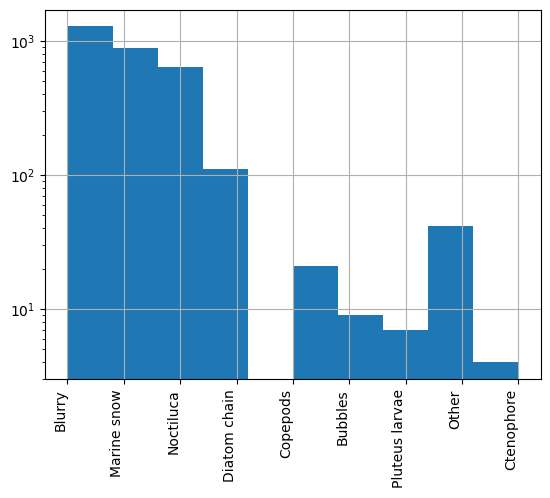

In [12]:
fig, ax = plt.subplots()
df_reformat["class"].hist(ax=ax, bins=10)
ax.set_xticklabels(df_reformat["class"].unique(), rotation=90, ha='right')
ax.set_yscale("log")

In [13]:
df_reformat[df_reformat["class"] == "Dinoflagellate"] 

,file,class
